# EDA - Xiaomi

In [1]:
import pandas as pd

In [2]:
df_3 = pd.read_json("reddit_xiaomi.json")
df_3.head()

,Title,Upvotes,URL,Created,Text
0,How to reduce spacing between icons in a folder,2,https://www.reddit.com/r/Xiaomi/comments/1hyt7...,1736591477,I just acquired a device with hyper os 2 and I...
1,Are you disappointed from Xiaomi Redmi Note 14...,6,https://www.reddit.com/r/Xiaomi/comments/1hysw...,1736590096,Did the Global versions of these devices disap...
2,Xiaomi Scooter 4 lite 2nd gen,1,https://www.reddit.com/r/Xiaomi/comments/1hysf...,1736588006,"Hi all,\n\nI received the Xiaomi scooter 4 lit..."
3,Xiaomi Smart Speaker (IR)- Not connecting to M...,1,https://www.reddit.com/r/Xiaomi/comments/1hys8...,1736587093,"Hi everyone,\n\nI recently got the Xiaomi Smar..."
4,Who switched from Samsung S24 Ultra to Xiaomi ...,1,https://www.reddit.com/r/Xiaomi/comments/1hyr5...,1736582173,I would like to hear the impressions. Generall...


In [3]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9430 entries, 0 to 9429
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9430 non-null   object
 1   Upvotes  9430 non-null   int64 
 2   URL      9430 non-null   object
 3   Created  9430 non-null   int64 
 4   Text     9430 non-null   object
dtypes: int64(2), object(3)
memory usage: 368.5+ KB


In [4]:
xiaomi = df_3.drop_duplicates()

In [5]:
xiaomi

,Title,Upvotes,URL,Created,Text
0,How to reduce spacing between icons in a folder,2,https://www.reddit.com/r/Xiaomi/comments/1hyt7...,1736591477,I just acquired a device with hyper os 2 and I...
1,Are you disappointed from Xiaomi Redmi Note 14...,6,https://www.reddit.com/r/Xiaomi/comments/1hysw...,1736590096,Did the Global versions of these devices disap...
2,Xiaomi Scooter 4 lite 2nd gen,1,https://www.reddit.com/r/Xiaomi/comments/1hysf...,1736588006,"Hi all,\n\nI received the Xiaomi scooter 4 lit..."
3,Xiaomi Smart Speaker (IR)- Not connecting to M...,1,https://www.reddit.com/r/Xiaomi/comments/1hys8...,1736587093,"Hi everyone,\n\nI recently got the Xiaomi Smar..."
4,Who switched from Samsung S24 Ultra to Xiaomi ...,1,https://www.reddit.com/r/Xiaomi/comments/1hyr5...,1736582173,I would like to hear the impressions. Generall...
...,...,...,...,...,...
9013,14 T Pro Standby by drain,11,https://www.reddit.com/r/Xiaomi/comments/1hdoy...,1734131242,"Hello, \nin the last time I noticed an increas..."
9114,Should i go for the redmi 13 pro 5g or poco x6,5,https://www.reddit.com/r/Xiaomi/comments/1h9iu...,1733664464,Where i live the redmi costs $250 and the poco...
9219,Reverting back to MIUI,34,https://www.reddit.com/r/Xiaomi/comments/1h4v2...,1733146451,"Let's face it guys, HyperOS and HyperOS 2 was ..."
9280,I bought a Poco X6 pro for $248 US (at change),6,https://www.reddit.com/r/Xiaomi/comments/1h2zy...,1732926042,"I bought a Poco X6 pro (256gb) for my sister, ..."


In [6]:
## so finally from xiaomi we are able to extract around 1500 rows.

In [7]:
xiaomi.describe

<bound method NDFrame.describe of                                                   Title  Upvotes  \
0      How to reduce spacing between icons in a folder         2   
1     Are you disappointed from Xiaomi Redmi Note 14...        6   
2                         Xiaomi Scooter 4 lite 2nd gen        1   
3     Xiaomi Smart Speaker (IR)- Not connecting to M...        1   
4     Who switched from Samsung S24 Ultra to Xiaomi ...        1   
...                                                 ...      ...   
9013                         14 T Pro Standby by drain        11   
9114     Should i go for the redmi 13 pro 5g or poco x6        5   
9219                             Reverting back to MIUI       34   
9280     I bought a Poco X6 pro for $248 US (at change)        6   
9298                    HyperOS 2 Horrible Battery Life       24   

                                                    URL     Created  \
0     https://www.reddit.com/r/Xiaomi/comments/1hyt7...  1736591477   
1     h

In [8]:
xiaomi.isnull().sum()

Title      0
Upvotes    0
URL        0
Created    0
Text       0
dtype: int64

In [9]:
import re
import nltk
from nltk.corpus import stopwords

In [10]:
def clean_text(text):
    # this is converting my entire text to lowercase
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z\s]', '', text) # removing punctuation and non-alphabetic characters of text clumn.

    stop_words = set(stopwords.words('english'))     # Removing stopwords
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])

    # Removing extra spaces
    text = ' '.join(text.split())

    return text

In [11]:
xiaomi['Text'][2]

"Hi all,\n\nI received the Xiaomi scooter 4 lite 2nd gen. When I took it out of the box and assembled it everything was fine. I drove a quick spin around the block which was enjoyable but the tires where a bit flat. So I pumped up the tires and gave it a charge until around 80 procent. Yesterday I rode to a friend's house and back with is about 7 kilometers no Biggie fun drive. Lost around 35 procent on sport mode. When I came home and want to charge it, the power brick indicates a red light and charging would get stuck at 45 procent. I tried a different socket which didn't help. I ran an updat on the app before I used it. Hmm really don't know what could be the problem. Anybody got ideas? "

In [12]:
raw_text = "Has anyone experienced lag on the Xiaomi Mi 11 after the recent update? Please help!"

cleaned_text = clean_text(raw_text)
cleaned_text


'anyone experienced lag xiaomi mi recent update please help'

In [13]:
xiaomi = xiaomi.drop(columns=['URL'])

In [14]:
## Clean- text

In [15]:
xiaomi.loc[:, 'Text'] = xiaomi['Text'].apply(clean_text)

# using Vader

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
xiaomi_ana = SentimentIntensityAnalyzer() # VADER sentiment analyzer

In [18]:
## simply defining a fucntion named assign_sentiment.

def assign_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [19]:
# Apply VADER sentiment analysis
xiaomi.loc[:, 'Sentiment-Vader'] = xiaomi['Text'].apply(lambda x: assign_sentiment(xiaomi_ana.polarity_scores(x)['compound']))

In [20]:
xiaomi['Sentiment-Vader']

0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
9013    Positive
9114    Positive
9219    Negative
9280    Positive
9298    Negative
Name: Sentiment-Vader, Length: 1523, dtype: object

In [21]:
xiaomi['Sentiment-Vader'].value_counts()

Sentiment-Vader
Positive    865
Neutral     337
Negative    321
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

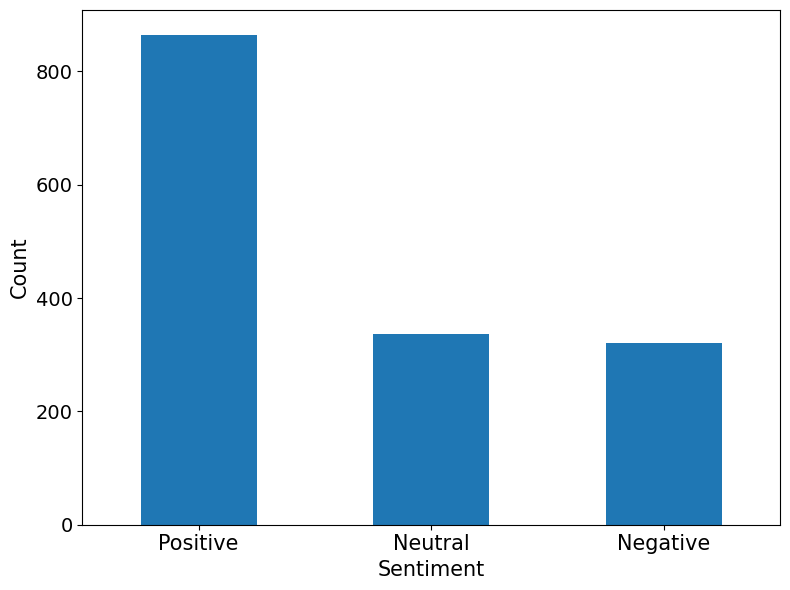

In [114]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
xiaomi['Sentiment-Vader'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [24]:
xiaomi['Upvotes']

0        2
1        6
2        1
3        1
4        1
        ..
9013    11
9114     5
9219    34
9280     6
9298    24
Name: Upvotes, Length: 1523, dtype: int64

In [25]:
xiaomi['Upvotes'].mean

<bound method Series.mean of 0        2
1        6
2        1
3        1
4        1
        ..
9013    11
9114     5
9219    34
9280     6
9298    24
Name: Upvotes, Length: 1523, dtype: int64>

In [26]:
xiaomi['Upvotes'].mean()

5.8319107025607355

In [27]:
## it simply defines the average of likes.

In [28]:
xiaomi.groupby('Sentiment-Vader')

In [29]:
xiaomi.groupby('Sentiment-Vader')['Upvotes'].mean()

Sentiment-Vader
Negative    7.386293
Neutral     4.937685
Positive    5.603468
Name: Upvotes, dtype: float64

<Axes: xlabel='Sentiment-Vader'>

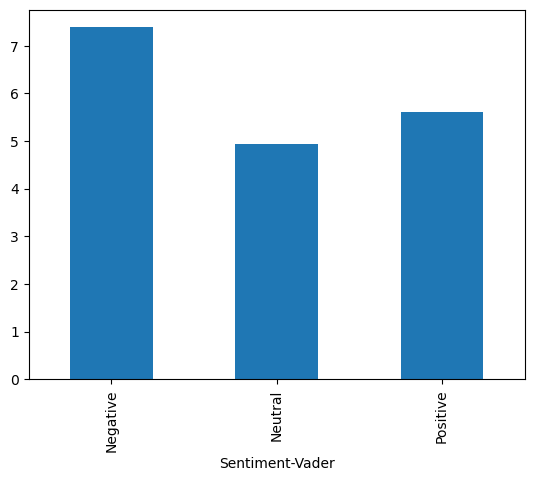

In [30]:
xiaomi.groupby('Sentiment-Vader')['Upvotes'].mean().plot(kind='bar')

# Temporal Sentiment Analysis

In [31]:
xiaomi['Created']  ## it is showing the timestamp, about the particular post like when it posted.

0       1736591477
1       1736590096
2       1736588006
3       1736587093
4       1736582173
           ...    
9013    1734131242
9114    1733664464
9219    1733146451
9280    1732926042
9298    1732838817
Name: Created, Length: 1523, dtype: int64

In [32]:
xiaomi['Created'].unique()

array([1736591477, 1736590096, 1736588006, 1736587093, 1736582173,
       1736581987, 1736580506, 1736572461, 1736557923, 1736555162,
       1736549691, 1736544749, 1736544421, 1736535739, 1736532075,
       1736529250, 1736527494, 1736526700, 1736526444, 1736520929,
       1736513029, 1736510739, 1736509180, 1736504846, 1736502928,
       1736495234, 1736494476, 1736473554, 1736470540, 1736467116,
       1736463025, 1736453670, 1736445946, 1736445355, 1736445158,
       1736440237, 1736435380, 1736425122, 1736424580, 1736413319,
       1736412051, 1736409721, 1736407750, 1736402235, 1736398896,
       1736392358, 1736392346, 1736382537, 1736382278, 1736375535,
       1736364504, 1736361662, 1736357141, 1736351606, 1736341877,
       1736332281, 1736323713, 1736320683, 1736320495, 1736319148,
       1736319126, 1736316200, 1736315997, 1736310450, 1736304960,
       1736301743, 1736290528, 1736281651, 1736275745, 1736275031,
       1736274193, 1736268388, 1736267161, 1736256950, 1736255

In [33]:
xiaomi['Created'].isna().sum()  ## simply give the count the number of missing values.

0

In [34]:
xiaomi['Created'] = pd.to_datetime(xiaomi['Created'],unit = 's' , errors='coerce')

In [35]:
xiaomi['Created']

0      2025-01-11 10:31:17
1      2025-01-11 10:08:16
2      2025-01-11 09:33:26
3      2025-01-11 09:18:13
4      2025-01-11 07:56:13
               ...        
9013   2024-12-13 23:07:22
9114   2024-12-08 13:27:44
9219   2024-12-02 13:34:11
9280   2024-11-30 00:20:42
9298   2024-11-29 00:06:57
Name: Created, Length: 1523, dtype: datetime64[ns]

In [36]:
xiaomi['Created'].unique()

<DatetimeArray>
['2025-01-11 10:31:17', '2025-01-11 10:08:16', '2025-01-11 09:33:26',
 '2025-01-11 09:18:13', '2025-01-11 07:56:13', '2025-01-11 07:53:07',
 '2025-01-11 07:28:26', '2025-01-11 05:14:21', '2025-01-11 01:12:03',
 '2025-01-11 00:26:02',
 ...
 '2024-11-23 17:56:34', '2024-11-23 17:25:56', '2024-11-23 16:47:43',
 '2024-11-23 15:52:16', '2024-11-23 13:31:03', '2024-11-23 13:27:36',
 '2024-11-23 10:18:49', '2024-11-23 10:12:50', '2024-11-23 09:46:13',
 '2024-11-23 08:44:44']
Length: 942, dtype: datetime64[ns]

In [37]:
from textblob import TextBlob

In [38]:
def for_sentiment(text):
    sentiment = xiaomi_ana.polarity_scores(text)
    return sentiment['compound']  # Compound score represents overall sentiment

In [39]:
# Apply sentiment analysis to the text column
xiaomi['sentiment'] = xiaomi['Text'].apply(lambda x: for_sentiment(x) if isinstance(x, str) else None)

In [40]:
xiaomi['sentiment'] = pd.to_numeric(xiaomi['sentiment'], errors='coerce')

In [41]:
daily_sentiment = xiaomi.groupby('Created')['sentiment'].mean().reset_index()

In [42]:
daily_sentiment.head()

,Created,sentiment
0,2024-11-23 08:44:44,0.7845
1,2024-11-23 09:46:13,-0.4215
2,2024-11-23 10:12:50,-0.5312
3,2024-11-23 10:18:49,0.4588
4,2024-11-23 13:27:36,-0.7269


In [43]:
import matplotlib.pyplot as plt

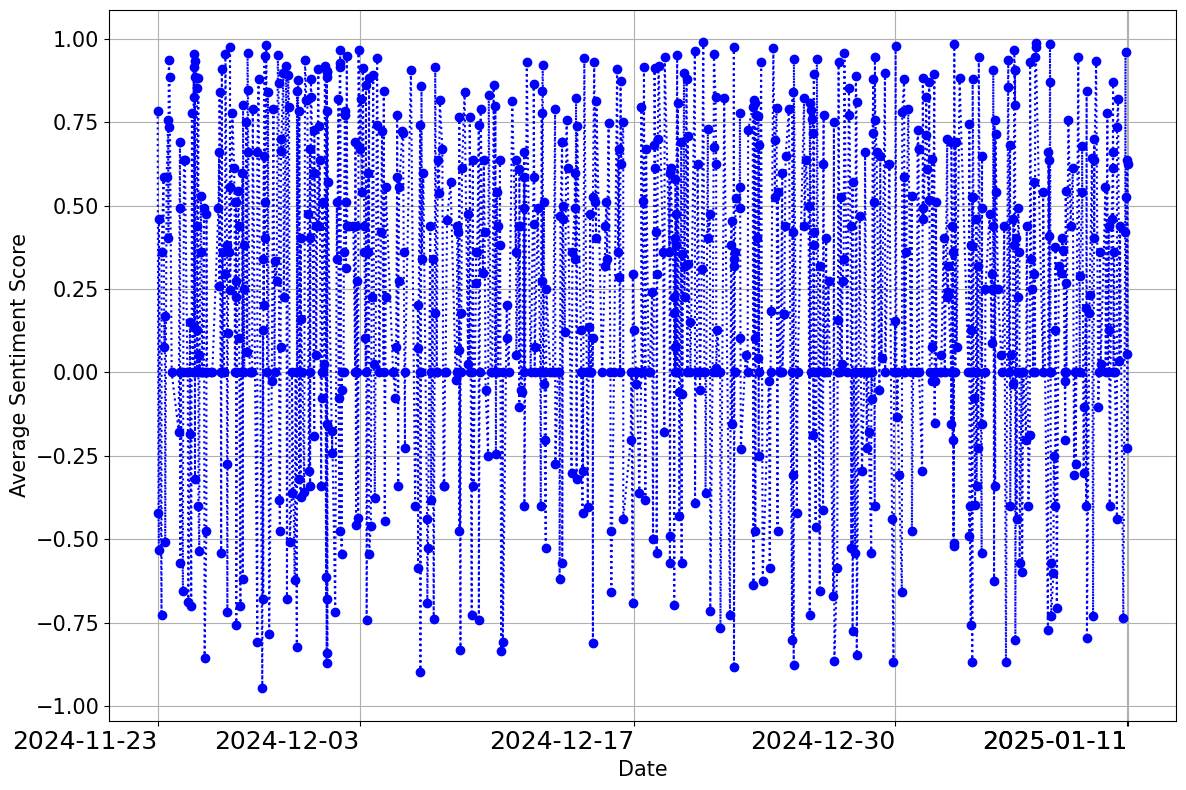

In [99]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data with a dotted line and blue color
ax.plot(daily_sentiment['Created'], daily_sentiment['sentiment'], marker='o', linestyle=':', color='b')

# Remove the title
# plt.title('Temporal Sentiment Shifts Over Days', fontsize=18)  # Removed as per request

# Labels with larger font size
plt.xlabel('Date', fontsize=15)  # Increased font size for x-label
plt.ylabel('Average Sentiment Score', fontsize=15)  # Increased font size for y-label

# Adjust the x-ticks to show fewer labels and rotate them for clarity
plt.xticks(rotation=0, ha='right', fontsize=18)  # Increased rotation and font size for x-ticks

# Increase font size for y-ticks without changing the ticks themselves
plt.yticks(fontsize=15)  # Increased font size for y-ticks

# Set the x-ticks to show 5 values: first, last, and 3 equally spaced ones in between
num_ticks = 5
x_positions = [0, len(daily_sentiment) - 1]  # Start with first and last positions
interval = len(daily_sentiment) // (num_ticks - 1)  # Calculate interval for 3 equally spaced ticks

# Add 3 equally spaced ticks between the first and last positions
x_positions.extend(range(interval, len(daily_sentiment) - 1, interval))

# Set x-ticks based on the calculated positions
ax.set_xticks(daily_sentiment['Created'].iloc[x_positions])

# Show grid for better visibility
plt.grid(True)

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
xiaomi.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment
0,How to reduce spacing between icons in a folder,2,2025-01-11 10:31:17,acquired device hyper os like lot icons home s...,Positive,0.6249
1,Are you disappointed from Xiaomi Redmi Note 14...,6,2025-01-11 10:08:16,global versions devices disappoint versions in...,Negative,-0.2263
2,Xiaomi Scooter 4 lite 2nd gen,1,2025-01-11 09:33:26,hi received xiaomi scooter lite nd gen took bo...,Positive,0.6369
3,Xiaomi Smart Speaker (IR)- Not connecting to M...,1,2025-01-11 09:18:13,hi everyone recently got xiaomi smart speaker ...,Positive,0.0567
4,Who switched from Samsung S24 Ultra to Xiaomi ...,1,2025-01-11 07:56:13,would like hear impressions generally ux displ...,Positive,0.5267


In [46]:
from wordcloud import WordCloud

In [47]:
wordcloud = WordCloud(width=800, height=400).generate(" ".join(xiaomi['Text'])) # Most Frequent Words.

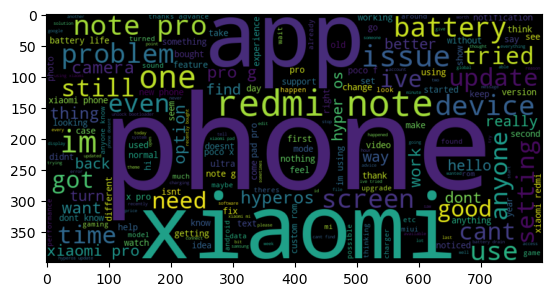

In [48]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Wordcloud for Positive vs Negative Sentiments

In [49]:
positive_reviews_count = len(xiaomi[xiaomi['Sentiment-Vader'] == 'Positive'])
negative_reviews_count = len(xiaomi[xiaomi['Sentiment-Vader'] == 'Negative'])

In [50]:
positive_reviews_count

865

In [51]:
negative_reviews_count

321

In [52]:
### Positive and negative review text
positive_reviews = ' '.join(xiaomi[xiaomi['Sentiment-Vader'] == 'Positive']['Text'])
negative_reviews = ' '.join(xiaomi[xiaomi['Sentiment-Vader'] == 'Negative']['Text'])

In [53]:
## Generating wordcloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

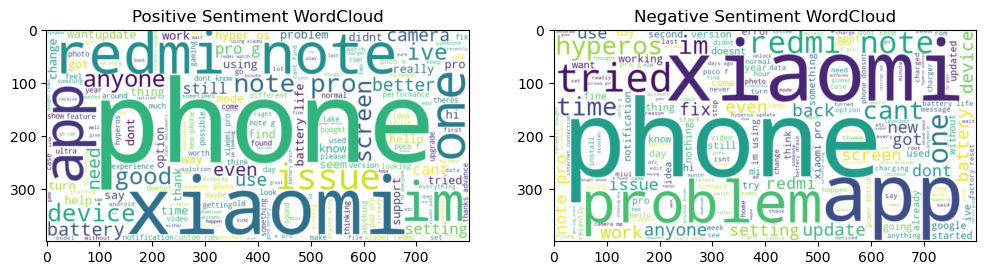

In [54]:
## plotting.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment WordCloud')
plt.show()

In [55]:
xiaomi.columns

Index(['Title', 'Upvotes', 'Created', 'Text', 'Sentiment-Vader', 'sentiment'], dtype='object')

In [56]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [57]:
# Apply sentiment analysis to the text column
xiaomi['Sentiment'] = xiaomi['Text'].apply(lambda x: get_sentiment(x) if isinstance(x, str) else None)

In [58]:
xiaomi.loc[:, 'Sentiment-TB'] = xiaomi['Text'].apply(lambda x: get_sentiment(x))

In [59]:
xiaomi['Sentiment-TB'].value_counts()

Sentiment-TB
Positive    814
Neutral     381
Negative    328
Name: count, dtype: int64

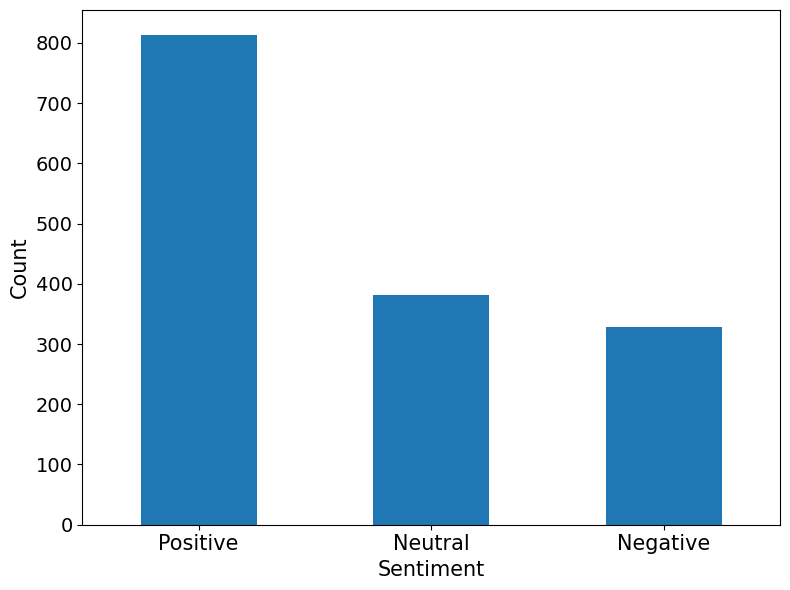

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
xiaomi['Sentiment-TB'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'], rotation=0, fontsize=15)
# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)


# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

## Keyword analysis

In [61]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
## Initializing vectorizer for topic modeling
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(xiaomi['Text'])   ## fitting the required data.

In [63]:
## by applying Latent Dirichlet Allocation i.e LDA
lda = LatentDirichletAllocation(n_components=50, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=50, random_state=42)

In [64]:
# Get the top words for each topic
terms = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([terms[i] for i in topic.argsort()[:-6:-1]])

In [65]:
print("Top topics:")
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {', '.join(topic)}")

Top topics:
Topic 1: help, working, speaker, replaced, removed
Topic 2: card, sim, missing, band, info
Topic 3: wallpapers, mah, eu, aod, super
Topic 4: control, device, security, wifi, center
Topic 5: good, poco, pro, sound, pad
Topic 6: reset, crashed, headphone, alarm, factory
Topic 7: ultra, notification, im, got, sony
Topic 8: battery, day, pro, life, phone
Topic 9: days, recommend, sensor, actually, charging
Topic 10: pen, ai, features, pro, draining
Topic 11: text, offer, worth, overall, data
Topic 12: experienced, white, christmas, gallery, button
Topic 13: space, lot, weird, themes, anybody
Topic 14: worth, pro, headphones, gave, phone
Topic 15: update, hyperos, version, beta, got
Topic 16: different, insights, tell, hours, given
Topic 17: games, audio, fps, restart, simply
Topic 18: battery, automatically, need, root, standby
Topic 19: received, update, photos, pro, better
Topic 20: notifications, gen, launch, disable, series
Topic 21: knows, tv, themes, compatible, ps
Topic 

## Aspect-Based Sentiment Analysis

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
## Lets define the aspects like their battery health , camera quality , about screen and all from the comments that are mostly highlighting.
aspects = ['camera', 'battery', 'screen', 'performance', 'ai', 'storage', 'design', 'model']

In [68]:
vectorizer = CountVectorizer(vocabulary=aspects, stop_words='english')

In [69]:
### Transform the text data
X = vectorizer.transform(xiaomi['Text'])

In [70]:
# Add column for aspect mention
xiaomi.loc[:, 'Aspect-Mentions'] = X.sum(axis=1)

In [71]:
# Analyze sentiment for each given aspect such as performance, battery and all.
for aspect in aspects:
    xiaomi[f'Sentiment-{aspect}'] = xiaomi['Text'].apply(lambda x: 'Positive' if aspect in x and TextBlob(x).sentiment.polarity > 0 else ('Negative' if aspect in x and TextBlob(x).sentiment.polarity < 0 else 'Neutral'))

In [72]:
xiaomi.loc[:, 'comparison'] = xiaomi['Sentiment-Vader'] == xiaomi['Sentiment-TB']

In [73]:
comparison_percentage = xiaomi['comparison'].mean() * 100
comparison_percentage

65.33158240315167

In [74]:
## Finally the aspect sentiments.
aspect_sentiment = xiaomi.groupby('comparison').agg({
    'Aspect-Mentions': 'sum',
    **{f'Sentiment-{aspect}': lambda x: x.value_counts().to_dict() for aspect in aspects}
}).reset_index()

In [75]:
print(aspect_sentiment)

   comparison  Aspect-Mentions  \
0       False              348   
1        True              807   

                                   Sentiment-camera  \
0  {'Neutral': 493, 'Negative': 22, 'Positive': 13}   
1  {'Neutral': 887, 'Positive': 91, 'Negative': 17}   

                                   Sentiment-battery  \
0   {'Neutral': 474, 'Positive': 32, 'Negative': 22}   
1  {'Neutral': 809, 'Positive': 144, 'Negative': 42}   

                                   Sentiment-screen  \
0  {'Neutral': 468, 'Negative': 39, 'Positive': 21}   
1  {'Neutral': 887, 'Positive': 79, 'Negative': 29}   

                             Sentiment-performance  \
0                  {'Neutral': 522, 'Positive': 6}   
1  {'Neutral': 935, 'Positive': 57, 'Negative': 3}   

                                        Sentiment-ai  \
0   {'Neutral': 403, 'Positive': 76, 'Negative': 49}   
1  {'Neutral': 749, 'Positive': 209, 'Negative': 37}   

                                 Sentiment-storage  \
0   {'Neut

## Word Frequency by Sentiment

In [76]:
positive_reviews = xiaomi[xiaomi['Sentiment-TB'] == 'Positive']['Text']
negative_reviews = xiaomi[xiaomi['Sentiment-TB'] == 'Negative']['Text']

In [77]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)

In [78]:
## for the positive one

In [79]:
positive_vector = vectorizer.fit_transform(positive_reviews)
positive_words = pd.DataFrame(positive_vector.toarray(), columns=vectorizer.get_feature_names_out())
print("Top Positive Words:")
print(positive_words.sum().sort_values(ascending=False).head(20))

Top Positive Words:
phone      673
xiaomi     475
pro        432
im         380
redmi      330
battery    322
like       249
note       242
good       201
ive        187
dont       174
using      173
know       173
use        172
new        170
app        165
tried      163
hyperos    152
really     148
camera     141
dtype: int64


In [80]:
## similarly for the negative one.
negative_vector = vectorizer.fit_transform(negative_reviews)
negative_words = pd.DataFrame(negative_vector.toarray(), columns=vectorizer.get_feature_names_out())
print("Top Negative Words:")
print(negative_words.sum().sort_values(ascending=False).head(20))

Top Negative Words:
phone      224
xiaomi     157
pro        133
battery    113
im         111
screen      98
like        87
redmi       81
app         80
hyperos     75
camera      72
using       68
know        63
note        59
time        56
update      53
doesnt      50
os          49
dont        48
got         48
dtype: int64


In [81]:
## in the same way we can do for neutral one also, no major change is there.

In [82]:
## here we Comparing sum of upvotes for each sentiment label.
upvotes_comparison = xiaomi.groupby(['comparison']).agg({'Upvotes': 'sum'}).reset_index()
upvotes_comparison

,comparison,Upvotes
0,False,2422
1,True,6460


In [83]:
## and in this we are Comparing each sentiment upvotes with the mean score.
avg_upvotes_sentiment = xiaomi.groupby(['comparison']).agg({'Upvotes': 'mean'}).reset_index()
avg_upvotes_sentiment

,comparison,Upvotes
0,False,4.587121
1,True,6.492462


## Aspect Sentiment Based on upvotes

In [84]:
aspect_sentiment_upvotes = xiaomi.groupby(['Aspect-Mentions']).agg({'Upvotes': 'sum'}).reset_index()

In [85]:
aspect_sentiment_upvotes

,Aspect-Mentions,Upvotes
0,0,5091
1,1,2061
2,2,698
3,3,272
4,4,107
5,5,259
6,6,60
7,7,72
8,8,237
9,9,1


In [86]:
aspect_sentiment_upvotes = xiaomi.groupby(['comparison', 'Aspect-Mentions']).agg({'Upvotes': 'sum'}).reset_index()

In [87]:
aspect_sentiment_upvotes

,comparison,Aspect-Mentions,Upvotes
0,False,0,1666
1,False,1,316
2,False,2,244
3,False,3,102
4,False,4,22
5,False,5,36
6,False,8,12
7,False,13,24
8,True,0,3425
9,True,1,1745


# BERT Sentiments

In [88]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [89]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [90]:
def safe_BERT_analysis(text):
    try:
        result = sentiment_pipeline(text[:512])  # Only take the first 512 characters
        return result[0]['label']
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

In [91]:
# Apply the sentiment analysis function to the 'text' column in the iPhone DataFrame
xiaomi['BERT-sentiment'] = xiaomi['Text'].apply(safe_BERT_analysis)

In [92]:
xiaomi.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment
0,How to reduce spacing between icons in a folder,2,2025-01-11 10:31:17,acquired device hyper os like lot icons home s...,Positive,0.6249,Neutral,Neutral,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,4 stars
1,Are you disappointed from Xiaomi Redmi Note 14...,6,2025-01-11 10:08:16,global versions devices disappoint versions in...,Negative,-0.2263,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,2 stars
2,Xiaomi Scooter 4 lite 2nd gen,1,2025-01-11 09:33:26,hi received xiaomi scooter lite nd gen took bo...,Positive,0.6369,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,2 stars
3,Xiaomi Smart Speaker (IR)- Not connecting to M...,1,2025-01-11 09:18:13,hi everyone recently got xiaomi smart speaker ...,Positive,0.0567,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,True,1 star
4,Who switched from Samsung S24 Ultra to Xiaomi ...,1,2025-01-11 07:56:13,would like hear impressions generally ux displ...,Positive,0.5267,Positive,Positive,1,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,3 stars


In [93]:
xiaomi['BERT-sentiment'].value_counts()

BERT-sentiment
1 star     791
4 stars    223
3 stars    200
5 stars    164
2 stars    145
Name: count, dtype: int64

In [94]:
new_mapping = {
    "1 star": "worst",
    "2 stars": "Bad",
    "3 stars": "Average",
    "4 stars": "Good",
    "5 stars": "Excellant"
}

In [95]:
xiaomi['BERT-sentiment'] = xiaomi['BERT-sentiment'].map(new_mapping)

In [96]:
xiaomi.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment
0,How to reduce spacing between icons in a folder,2,2025-01-11 10:31:17,acquired device hyper os like lot icons home s...,Positive,0.6249,Neutral,Neutral,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,Good
1,Are you disappointed from Xiaomi Redmi Note 14...,6,2025-01-11 10:08:16,global versions devices disappoint versions in...,Negative,-0.2263,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,Bad
2,Xiaomi Scooter 4 lite 2nd gen,1,2025-01-11 09:33:26,hi received xiaomi scooter lite nd gen took bo...,Positive,0.6369,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Bad
3,Xiaomi Smart Speaker (IR)- Not connecting to M...,1,2025-01-11 09:18:13,hi everyone recently got xiaomi smart speaker ...,Positive,0.0567,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,True,worst
4,Who switched from Samsung S24 Ultra to Xiaomi ...,1,2025-01-11 07:56:13,would like hear impressions generally ux displ...,Positive,0.5267,Positive,Positive,1,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Average


In [112]:
xiaomi['BERT-sentiment'].value_counts()

BERT-sentiment
worst        791
Good         223
Average      200
Excellant    164
Bad          145
Name: count, dtype: int64

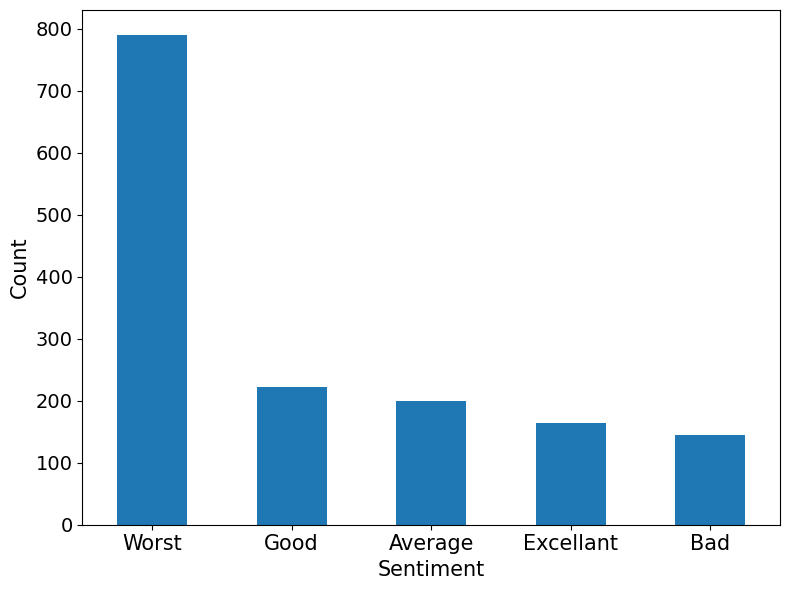

In [113]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
xiaomi['BERT-sentiment'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Worst','Good','Average','Excellant','Bad'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

# RoBERTa Sentiments

In [101]:
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

In [102]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
def get_Roberta_sentiment(text):
    if not text:  # Check for empty text
        return 'neutral'  # You can return a default sentiment if text is empty
    
    sentences = nltk.sent_tokenize(text)  # Split text into sentences
    sentiments = []
    
    # Apply sentiment analysis for each sentence
    for sentence in sentences:
        try:
            # Check for any empty sentence
            if sentence.strip():
                result = sentiment_pipeline(sentence, truncation=True, padding=True, max_length=512)
                if result:  # Check if sentiment analysis returned a result
                    sentiments.append(result[0]['label'])
        except Exception as e:
            print(f"Error processing sentence '{sentence}': {e}")
    
    # Check if no valid sentiments were collected
    if not sentiments:
        return 'neutral'  # Return a default sentiment if no sentiments are found
    
    # Return the majority sentiment, or you can choose a different aggregation method
    return max(set(sentiments), key=sentiments.count)

In [104]:
xiaomi['RoBERTa-sentiment'] = xiaomi['Text'].apply(get_Roberta_sentiment)

In [105]:
xiaomi.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment,RoBERTa-sentiment
0,How to reduce spacing between icons in a folder,2,2025-01-11 10:31:17,acquired device hyper os like lot icons home s...,Positive,0.6249,Neutral,Neutral,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,Good,LABEL_1
1,Are you disappointed from Xiaomi Redmi Note 14...,6,2025-01-11 10:08:16,global versions devices disappoint versions in...,Negative,-0.2263,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,Bad,LABEL_1
2,Xiaomi Scooter 4 lite 2nd gen,1,2025-01-11 09:33:26,hi received xiaomi scooter lite nd gen took bo...,Positive,0.6369,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Bad,LABEL_1
3,Xiaomi Smart Speaker (IR)- Not connecting to M...,1,2025-01-11 09:18:13,hi everyone recently got xiaomi smart speaker ...,Positive,0.0567,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,True,worst,LABEL_0
4,Who switched from Samsung S24 Ultra to Xiaomi ...,1,2025-01-11 07:56:13,would like hear impressions generally ux displ...,Positive,0.5267,Positive,Positive,1,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Average,LABEL_1


In [106]:
xiaomi['RoBERTa-sentiment'].value_counts()

RoBERTa-sentiment
LABEL_1    876
LABEL_0    377
LABEL_2    267
neutral      3
Name: count, dtype: int64

In [107]:
label_map = {
    'LABEL_0': 'negative',  # or 'LABEL_0' represents negative sentiment
    'LABEL_1': 'neutral',   # 'LABEL_1' represents neutral sentiment
    'LABEL_2': 'positive',  # 'LABEL_2' represents positive sentiment
}

In [108]:
xiaomi['RoBERTa-sentiment'] = xiaomi['RoBERTa-sentiment'].map(label_map)

In [109]:
xiaomi['RoBERTa-sentiment'].value_counts()

RoBERTa-sentiment
neutral     876
negative    377
positive    267
Name: count, dtype: int64

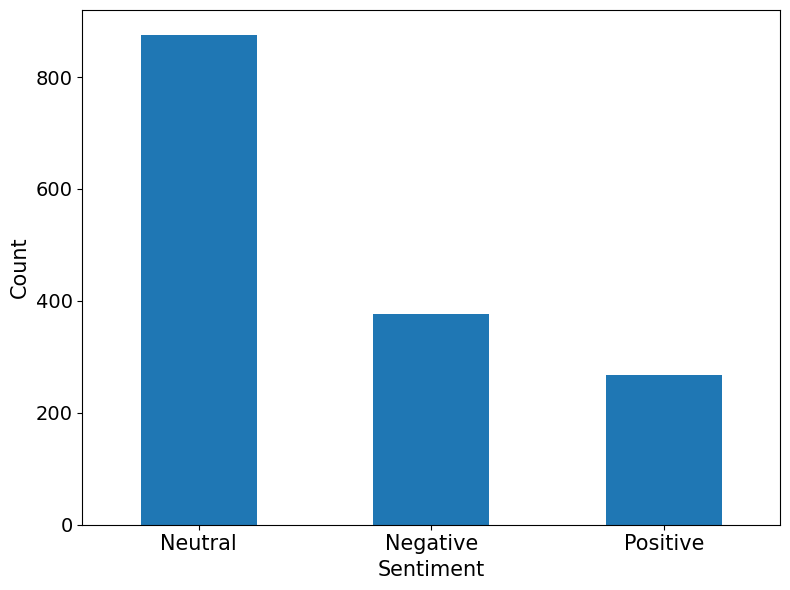

In [110]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size
xiaomi['RoBERTa-sentiment'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Neutral', 'Negative', 'Positive'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [111]:
xiaomi.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment,RoBERTa-sentiment
0,How to reduce spacing between icons in a folder,2,2025-01-11 10:31:17,acquired device hyper os like lot icons home s...,Positive,0.6249,Neutral,Neutral,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,Good,neutral
1,Are you disappointed from Xiaomi Redmi Note 14...,6,2025-01-11 10:08:16,global versions devices disappoint versions in...,Negative,-0.2263,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,False,Bad,neutral
2,Xiaomi Scooter 4 lite 2nd gen,1,2025-01-11 09:33:26,hi received xiaomi scooter lite nd gen took bo...,Positive,0.6369,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Bad,neutral
3,Xiaomi Smart Speaker (IR)- Not connecting to M...,1,2025-01-11 09:18:13,hi everyone recently got xiaomi smart speaker ...,Positive,0.0567,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,True,worst,negative
4,Who switched from Samsung S24 Ultra to Xiaomi ...,1,2025-01-11 07:56:13,would like hear impressions generally ux displ...,Positive,0.5267,Positive,Positive,1,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Average,neutral
